# Case Study 1

## Dataset Description: The file consists of start-ups investment details.

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### 1.Read the given comma separated values as dataframe (investments.csv)

In [43]:
df = pd.read_csv('investments.csv')
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1,2012.0,0,0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1,2011.0,0,0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0


### 2.List out all column names.

In [46]:
col = df.columns
print(list(col))

['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_year', 'debt_financing', 'grant']


### 3.Create a dataframe with numerical columns.

In [47]:
new_df = df.select_dtypes('number')
new_df.head()

,funding_rounds,founded_year,debt_financing,grant
0,1,2012.0,0,0
1,2,NaN,0,0
2,1,2012.0,0,0
3,1,2011.0,0,0
4,2,2014.0,0,0


### 4.Create a dataframe with categorical columns.

In [48]:
new_df = df.select_dtypes('object')
new_df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth


### 5.Get a summary on the data and draw inferences if any.

In [7]:
df.describe()

,funding_rounds,founded_year,debt_financing,grant
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,1.888157e+06,1.628453e+05
std,1.294213,7.579203,1.382046e+08,5.612088e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,3.007950e+10,7.505000e+08


### 6.Display duplicate rows.

In [49]:
df.duplicated().sum()

0

### 7.For each column find out the percentage of missing values.

In [59]:
df.isnull().sum()/len(df)*100
mising_value_df = pd.DataFrame({'column_name': df.columns,
                               "percent_missing_values": percent_missing})
missing_value_df

,column_name,percent_missing
name,name,0.002023
homepage_url,homepage_url,6.976415
category_list,category_list,8.012056
market,market,8.026215
funding_total_usd,funding_total_usd,0.000000
status,status,2.657875
country_code,country_code,10.665885
state_code,state_code,38.992273
region,region,10.665885
city,city,12.371051


### 8.Find count of ‘name’ in each ‘country_code’.

In [65]:
df.groupby('country_code')['name'].count().head()

country_code
ALB      1
ARE     66
ARG    149
ARM      2
AUS    314
Name: name, dtype: int64

### 9.What is the percentage of the companies which have status ‘acquired’ or ‘operating’?

In [66]:
df[df.status.isin(['acquired','operating'])].shape[0]/len(df)*100

92.07694486022898

### 10.What is the percentage of the companies which have status ‘acquired’ and 'operating'?

In [69]:
df[df.status.isin(['acquired' and 'operating'])].shape[0]/len(df)/100

0.008460900521865771

### 11.Filter records having missing values in column ‘year_founded’.

In [72]:
df[df.founded_year.isna()].head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0
6,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"49,12,393",closed,ARG,NaN,Buenos Aires,Buenos Aires,1,NaN,0,0
9,01Games Technology,http://www.01games.hk/,|Games|,Games,"41,250",operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,0,0
11,1-4 All,NaN,|Entertainment|Games|Software|,Software,-,operating,USA,NC,NC - Other,Connellys Springs,1,NaN,0,0
19,1000jobboersen.de,http://www.1000jobboersen.de,|Curated Web|,Curated Web,-,operating,DEU,NaN,Berlin,Berlin,1,NaN,0,0


### 12.Create a column ‘category_list_count’ having count of category lists.

In [15]:
df['category_list_count'] = df.category_list.apply(lambda row : len(str(row).split('|')) - 2)
df.loc[:,['category_list','category_list_count']].head()

,category_list,category_list_count
0,|Entertainment|Politics|Social Media|News|,4
1,|Games|,1
2,|Publishing|Education|,2
3,|Electronics|Guides|Coffee|Restaurants|Music|i...,10
4,|Tourism|Entertainment|Games|,3


### 13.Find average funding_total_usd for each country_code.

In [16]:
df.funding_total_usd = df.funding_total_usd.apply(lambda x : x.replace(',',''))
df.funding_total_usd = df.funding_total_usd.apply(lambda x : x.replace('-','0'))
df.funding_total_usd = df.funding_total_usd.astype(float)
df.groupby('country_code')['funding_total_usd'].mean()

country_code
ALB    0.000000e+00
ARE    9.832352e+06
ARG    1.787353e+06
ARM    1.340649e+07
AUS    8.276922e+06
           ...     
USA    1.612353e+07
UZB    9.000000e+04
VNM    1.023431e+07
ZAF    1.243687e+07
ZWE    1.000000e+07
Name: funding_total_usd, Length: 115, dtype: float64

### 14.Find total funding_total_usd for each country_code.

In [17]:
df.groupby('country_code')['funding_total_usd'].mean()

country_code
ALB    0.000000e+00
ARE    9.832352e+06
ARG    1.787353e+06
ARM    1.340649e+07
AUS    8.276922e+06
           ...     
USA    1.612353e+07
UZB    9.000000e+04
VNM    1.023431e+07
ZAF    1.243687e+07
ZWE    1.000000e+07
Name: funding_total_usd, Length: 115, dtype: float64

### 15.Find average funding_total_usd in each country_code and region.

In [18]:
pd.pivot_table(df, 'funding_total_usd', ['country_code', 'region'], aggfunc='mean')

funding_total_usd
country_code region                         
ALB          Tirana             0.000000e+00
ARE          Abu Dhabi          1.562500e+07
             Dubai              9.651332e+06
ARG          ARG - Other        3.049519e+05
             Buenos Aires       1.760614e+06
...                                      ...
ZAF          Cape Town          1.559547e+07
             Durban             0.000000e+00
             Johannesburg       6.091429e+06
             ZAF - Other        0.000000e+00
ZWE          Harare             1.000000e+07

[1096 rows x 1 columns]

### 16.How many companies have got just 1 round of funding?

In [76]:
### including duplicates
print(df[df.funding_rounds == 1]['name'].shape[0]) 
### excluding duplicates
print(len(df[df.funding_rounds == 1]['name'].unique())) 
## excluding duplicates and nan
print(df[df.funding_rounds == 1]['name'].nunique()) 
### including duplicates but excluding nan
print(df[df.funding_rounds == 1]['name'].count()) 

32039
32006
32005
32038


### 17.Perform mapping on status column; acquired -> A, operating -> O and closed -> C.

In [20]:
df.status.apply(lambda s: 'A' if s == 'acquired' else 'O' if s == 'operating' else 'C' if s=='closed' else 'NA').head()

0    A
1    O
2    O
3    O
4    O
Name: status, dtype: object

### 18.How many companies have ‘debt_financing’ above zero?

In [21]:
### including duplicates
print(df[df.debt_financing > 0]['name'].shape[0]) 
### excluding duplicates
print(len(df[df.debt_financing > 0]['name'].unique())) 
## excluding duplicates and nan
print(df[df.debt_financing > 0]['name'].nunique()) 
### including duplicates but excluding nan
print(df[df.debt_financing > 0]['name'].count()) 

4225
4225
4225
4225


### 19.Create a column ‘homepage’ to store company name from ‘homepage_url’: For example: If url is http://www.waywire.com, name is waywire.

In [22]:
import re

df.homepage_url.apply(lambda url: re.sub(pattern = ('http://www.|.com|/|http:|.org'), repl = '', string = str(url), flags= re.I)).head()

0           waywire
1        enjoyandtv
2     rockyourpaper
3    InTouchNetwork
4               nan
Name: homepage_url, dtype: object

### 20.Find the count of companies in each of the markets.

In [23]:
df.groupby('market')['name'].count()

market
3D               25
3D Printing       9
3D Technology     8
Accounting       18
Ad Targeting     13
                 ..
iOS              48
iPad             29
iPhone           69
iPod Touch        3
mHealth           8
Name: name, Length: 753, dtype: int64

### 21.Find the count of companies in each of the markets and store the new column ‘cnt_name’ in the original dataframe.

In [24]:
df['cnt_name'] = df.groupby('market')['name'].transform('count')
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,cnt_name
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,4,378.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1,1182.0
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,2,69.0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,2011.0,0,0,10,43.0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0,3,21.0


### 22.Rename ' funding_total_usd ' to 'funding_total_usd'

In [25]:
df.rename(columns = {'funding_total_usd':'funding_total_USD'})

,name,homepage_url,category_list,market,funding_total_USD,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,cnt_name
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,4,378.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1,1182.0
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,2,69.0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,2011.0,0,0,10,43.0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0,3,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000.0,operating,GBR,NaN,London,London,1,2013.0,0,0,6,863.0
49434,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1587301.0,operating,CHN,NaN,Beijing,Beijing,1,NaN,0,0,1,1280.0
49435,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398.0,operating,HRV,NaN,Split,Split,5,2012.0,0,0,4,103.0
49436,[a]list games,http://www.alistgames.com,|Games|,Games,9300000.0,operating,NaN,NaN,NaN,NaN,1,NaN,0,0,1,1182.0


### 23.Fill missing values in column ‘city’ with ‘other_city’

In [26]:
df.city.fillna('other_city', inplace = True)
df

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,cnt_name
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,4,378.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1,1182.0
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,2,69.0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,2011.0,0,0,10,43.0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0,3,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000.0,operating,GBR,NaN,London,London,1,2013.0,0,0,6,863.0
49434,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1587301.0,operating,CHN,NaN,Beijing,Beijing,1,NaN,0,0,1,1280.0
49435,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398.0,operating,HRV,NaN,Split,Split,5,2012.0,0,0,4,103.0
49436,[a]list games,http://www.alistgames.com,|Games|,Games,9300000.0,operating,NaN,NaN,NaN,other_city,1,NaN,0,0,1,1182.0


### 24.For each row in column ‘funding_total_usd’, calculate actual – average value for each group ‘city’

In [27]:
df.groupby('city')['funding_total_usd'].transform(lambda x: x - np.mean(x)).head()

0   -2.444616e+07
1   -7.234447e+06
2   -1.723232e+06
3   -6.784773e+06
4   -3.522942e+07
Name: funding_total_usd, dtype: float64

### 25.Normalize ‘‘funding_total_usd’ at country level.

In [28]:
df.country_code.fillna('other_country', inplace = True)
df.groupby('country_code')['funding_total_usd'].transform(lambda x: x/np.max(x)).head()

0    0.000058
1    0.000133
2    0.002106
3    0.002381
4    0.000002
Name: funding_total_usd, dtype: float64

### 26.What is the average ‘funding_total_usd’ for each city?

In [29]:
df.groupby('city')['funding_total_usd'].mean().head()

city
6 October City    1.450000e+05
A Coruña          1.236930e+06
Aachen            6.448845e+06
Aalborg           1.166667e+05
Aarhus            2.546595e+06
Name: funding_total_usd, dtype: float64

### 27.Plot histogram/distribution of ‘funding_total_usd’ and provide insights if any.

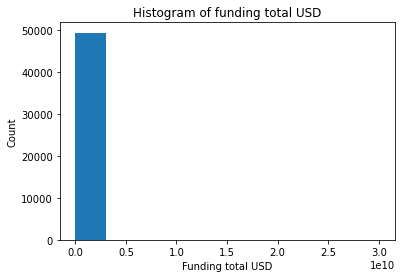

In [32]:
plt.hist(df.funding_total_usd)
plt.xlabel('Funding total USD')
plt.ylabel('Count')
plt.title('Histogram of funding total USD')
plt.show()

### 28.What is maximum ‘funding_total_usd’ for each market status?

In [33]:
df.groupby('status')['funding_total_usd'].max()

status
acquired     5.700000e+09
closed       1.567504e+09
operating    3.007950e+10
Name: funding_total_usd, dtype: float64

### 29.How many years has it been since each company was founded?

In [34]:
from datetime import datetime
df['cmpany_age'] = datetime.today().year -  df.founded_year
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,cnt_name,cmpany_age
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,4,378.0,9.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1,1182.0,NaN
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,2,69.0,9.0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,2011.0,0,0,10,43.0,10.0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0,3,21.0,7.0


### 30.Visualize ‘grant’ distribution.

Text(0.5, 1.0, 'Top 10 markets with high grants')

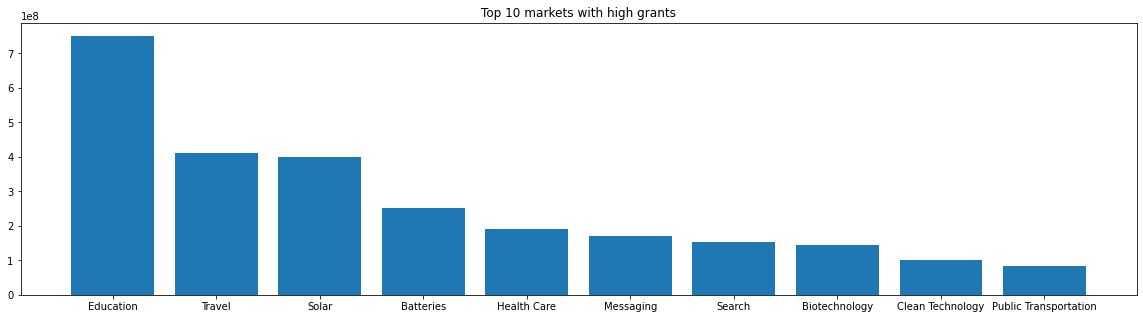

In [35]:
x = df.groupby('market')[['grant']].max().reset_index().sort_values('grant', ascending = False)[0:10]
plt.figure(figsize = (20,5))
plt.bar(x.market, x.grant)
plt.title('Top 10 markets with high grants')

### 31.Visualize ‘debt_financing’ distribution.

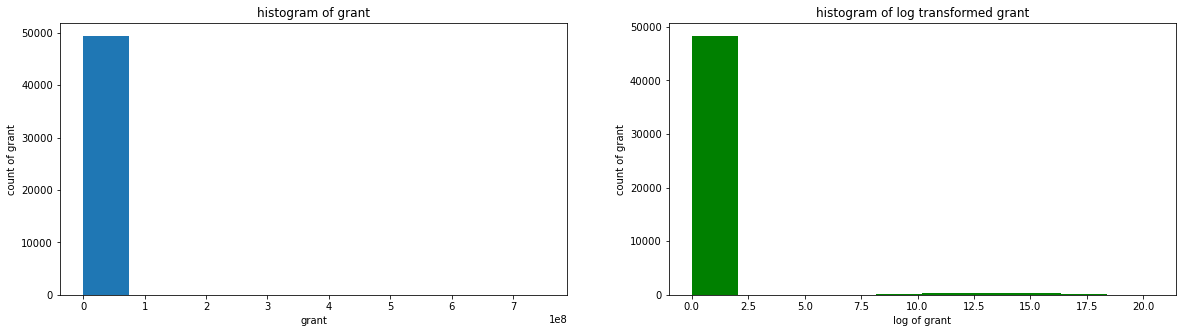

In [37]:
fig, ax = plt.subplots(1,2,figsize = (20,5))
ax[0].hist(df.grant)
ax[0].set_xlabel('grant')
ax[0].set_ylabel('count of grant')
ax[0].set_title('histogram of grant')

ax[1].hist(np.log1p(df.grant), color = 'g')
ax[1].set_xlabel('log of grant')
ax[1].set_ylabel('count of grant')
ax[1].set_title('histogram of log transformed grant')
plt.show()

### 32.Display proportion of companies status.

In [38]:
df.groupby('status')[['name']].count()/len(df)*100

,name
status,
acquired,7.467940
closed,5.263158
operating,84.609005


### 33.How many US states are available?

In [39]:
df[df.country_code == 'USA']['state_code'].nunique()

51

### 34.create column ‘cmt_address’ by joining country code, state code, region and city.

In [40]:
df['cmt_address']  = df.country_code + '-' + df.state_code + '-' + df.region + '-'+ df.city
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,cnt_name,cmpany_age,cmt_address
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,4,378.0,9.0,USA-NY-New York City-New York
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1,1182.0,NaN,USA-CA-Los Angeles-Los Angeles
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,2,69.0,9.0,NaN
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,2011.0,0,0,10,43.0,10.0,NaN
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0,3,21.0,7.0,USA-TX-Dallas-Fort Worth


### 35.select columns with underscore in their names.

In [41]:
df.filter(regex = '_').head()

,homepage_url,category_list,funding_total_usd,country_code,state_code,funding_rounds,founded_year,debt_financing,category_list_count,cnt_name,cmpany_age,cmt_address
0,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,1750000.0,USA,NY,1,2012.0,0,4,378.0,9.0,USA-NY-New York City-New York
1,http://enjoyandtv.com,|Games|,4000000.0,USA,CA,2,NaN,0,1,1182.0,NaN,USA-CA-Los Angeles-Los Angeles
2,http://www.rockyourpaper.org,|Publishing|Education|,40000.0,EST,NaN,1,2012.0,0,2,69.0,9.0,NaN
3,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,1500000.0,GBR,NaN,1,2011.0,0,10,43.0,10.0,NaN
4,NaN,|Tourism|Entertainment|Games|,60000.0,USA,TX,2,2014.0,0,3,21.0,7.0,USA-TX-Dallas-Fort Worth
